Experiment 1: Binary Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data_source = pd.read_csv('dataset_exp1.csv')
data_source.columns = data_source.columns.str.strip()

In [ ]:
data_source.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,0.0
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,0.0
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,0.0
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [ ]:
data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163638 entries, 0 to 163637
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             163638 non-null  int64  
 1   Flow Duration                163638 non-null  int64  
 2   Total Fwd Packets            163638 non-null  int64  
 3   Total Backward Packets       163638 non-null  int64  
 4   Total Length of Fwd Packets  163638 non-null  int64  
 5   Total Length of Bwd Packets  163638 non-null  int64  
 6   Fwd Packet Length Max        163638 non-null  int64  
 7   Fwd Packet Length Min        163638 non-null  int64  
 8   Fwd Packet Length Mean       163638 non-null  float64
 9   Fwd Packet Length Std        163638 non-null  float64
 10  Bwd Packet Length Max        163638 non-null  int64  
 11  Bwd Packet Length Min        163638 non-null  int64  
 12  Bwd Packet Length Mean       163638 non-null  float64
 13 

In [ ]:
data_source.shape


(163638, 79)

In [ ]:
data_source.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 79, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

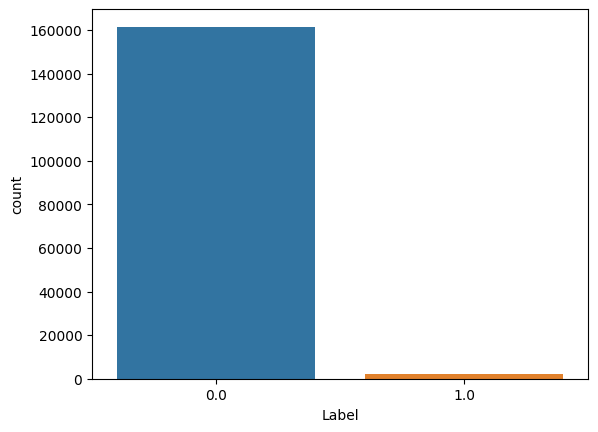

In [ ]:
sns.countplot(x=data_source['Label'])

**Data Source**: Labeled CSV file from CICIDS 2017
* 170366 samples total with 2180 attack samples (8:1)
* 79 fields
* Labeled: normal with 0 and abnormal with 1

**Data Processing**
* 4 important fields: 'Init_Win_bytes_forward', 'Subflow Fwd Bytes', 'Init_Win_bytes_backward', 'Total Length of Fwd Packets'
* Training dataset: **12000** normal samples and **1200** abnormal samples
* Testing dataset: **1000** normal samples and **980** abnormal samples


In [ ]:
# Keep the important features for web attack
  columns_to_keep = [
      'Init_Win_bytes_forward',
      'Subflow Fwd Bytes',
      'Init_Win_bytes_backward',
      'Total Length of Fwd Packets',
      'Label'
  ]
  data_source = data_source[columns_to_keep]
  data_source.head()

,Init_Win_bytes_forward,Subflow Fwd Bytes,Init_Win_bytes_backward,Total Length of Fwd Packets,Label
0,571,9668,2079,9668,0.0
1,390,11364,2081,11364,0.0
2,-1,0,-1,0,0.0
3,8192,2330,513,2330,0.0
4,-1,102,-1,102,0.0


In [ ]:
normal_samples = data_source[data_source['Label'] == 0]
abnormal_samples = data_source[data_source['Label'] == 1]
normal_train, normal_test = train_test_split(normal_samples, train_size=12000, test_size=1000)
abnormal_train, abnormal_test = train_test_split(abnormal_samples, train_size=1200, test_size=980)

In [ ]:
normal_train.shape

(12000, 5)

In [ ]:
normal_test.shape

(1000, 5)

In [ ]:
abnormal_train.shape

(1200, 5)

In [ ]:
abnormal_test.shape

(980, 5)

In [ ]:
train = pd.concat([normal_train, abnormal_train])
test = pd.concat([normal_test, abnormal_test])

x_train = train.drop('Label', axis=1)
x_test = test.drop('Label', axis=1)

y_train = train['Label']
y_test = test['Label']


In [ ]:
# scale the features in both the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

The features are Init_Win_bytes_forward, Subflow Fwd Bytes, Init_Win_bytes_backward, Total Length of Fwd Packets.

The characteristics Init_Win_bytes_forward, Subflow Fwd Bytes, Init_Win_bytes_backward, Total Length of Fwd Packets have different larger or smaller values. For example, Init_Win_bytes_forward has a value from -1 to 8192 while Subflow Fwd Bytes has a value from 0 to 11364. This means that Subflow Fwd Bytes contributes more than Init_Win_bytes_forward in the process of calculating the distance between data points. .

After scaling according to the StandardScaler method, the original data will be converted to a mean of 0 and a standard deviation of 1.

"mean" refers to the average value of a feature in a data set. It represents the central value of the data distribution. By setting the mean to 0, we define a reference point for the data after scaling. A negative value of a feature after scaling indicates that it is lower than the original mean value, while a positive value indicates that it is higher than the original mean value.

Ví dụ:

data = [

        [571	9668	 2079	9668 ],
        [390	11364	2081	11364],
        [-1 	0    	-1  	0    ],
        [8192   2330     513 	2330 ],
        [-1 	102  	-1	  102  ]]

scaled_data = [
  
        [-0.39489522  1.02439715  1.19977001  1.02439715],
        [-0.45165827  1.37360474  1.20186605  1.37360474],
        [-0.574279   -0.9662508  -0.98010562 -0.9662508 ],
        [ 1.99511148 -0.48650217 -0.44142482 -0.48650217],
        [-0.574279   -0.94524893 -0.98010562 -0.94524893]]

**K-Nearest Neighbor Model**

In [ ]:
#  Training K-nearest neighbor (KNN) Model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=2)

Training Accuracy: 0.9235606060606061
Test Accuracy: 0.5762626262626263
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70      1000
         1.0       1.00      0.14      0.25       980

    accuracy                           0.58      1980
   macro avg       0.77      0.57      0.48      1980
weighted avg       0.77      0.58      0.48      1980

Confusion Matrix:
[[1000    0]
 [ 839  141]]


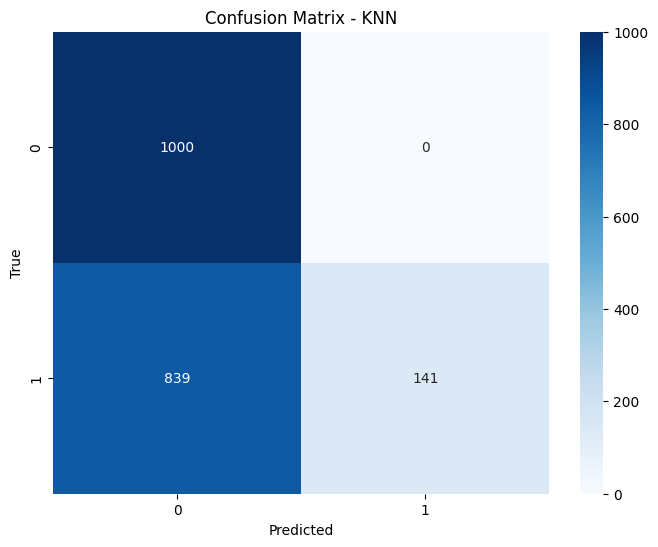

In [ ]:
# Predictions, Evaluate and print accuracy
y_pred_train_knn = knn_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_knn))
y_pred_test_knn = knn_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_knn))

# Print classification report for the test set
print("Classification Report:")
print(classification_report(y_test, y_pred_test_knn))

# Print confusion matrix for the test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_knn))

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Decision Trees Model**

In [ ]:
#  Decision Trees Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

Training Accuracy: 0.9968939393939394
Test Accuracy: 0.9914141414141414
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

Confusion Matrix:
[[996   4]
 [ 13 967]]


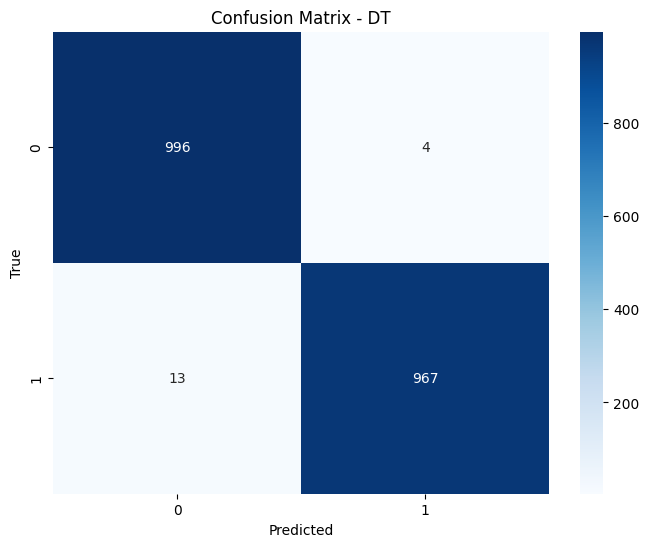

In [ ]:
# Predictions, Evaluate and print accuracy
y_pred_train_dt = dt_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_dt))
y_pred_test_dt = dt_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_dt))


# Print classification report for the test set
print("Classification Report:")
print(classification_report(y_test, y_pred_test_dt))

# Print confusion matrix for the test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_dt))
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - DT')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Random Forest Model**

In [ ]:
#  Random Forests Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Training Accuracy: 0.9968939393939394
Test Accuracy: 0.9919191919191919
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

Confusion Matrix:
[[998   2]
 [ 14 966]]


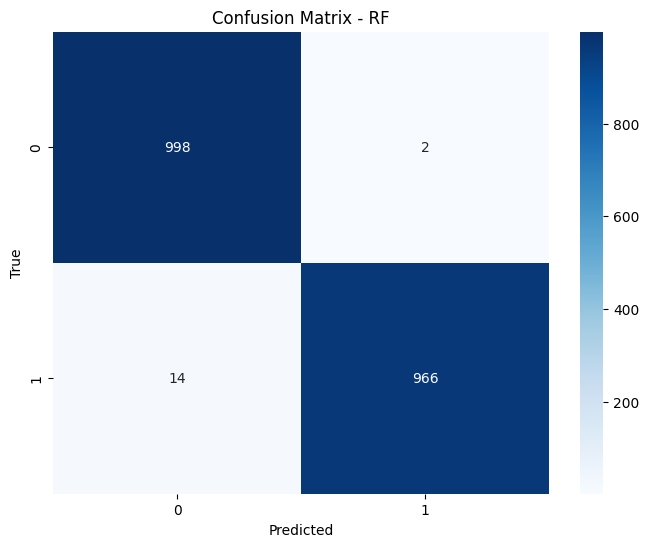

In [ ]:
# Predictions, Evaluate and print accuracy
y_pred_train_rf = rf_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
y_pred_test_rf = rf_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))


# Print classification report for the test set
print("Classification Report:")
print(classification_report(y_test, y_pred_test_rf))

# Print confusion matrix for the test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_rf))
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Support Vector Machine Model**

In [ ]:
 # SVM Model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)


SVC()

Training Accuracy: 0.9834090909090909
Test Accuracy: 0.9353535353535354
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1000
           1       0.99      0.87      0.93       980

    accuracy                           0.94      1980
   macro avg       0.94      0.93      0.94      1980
weighted avg       0.94      0.94      0.94      1980

Confusion Matrix:
[[995   5]
 [123 857]]


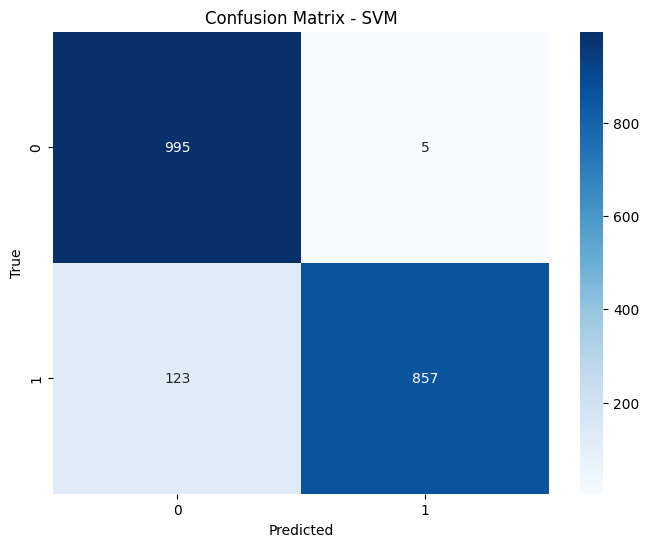

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)
# Predictions, Evaluate and print accuracy
y_pred_train_svm = svm_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_svm))
y_pred_test_svm = svm_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_svm))

# Print classification report for the test set
print("Classification Report:")
print(classification_report(y_test, y_pred_test_svm))

# Print confusion matrix for the test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_svm))

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Comparison Between The Models**

                Model  Accuracy  Precision    Recall  F1-Score
0  K-nearest neighbor  0.574747   1.000000  0.140816  0.246869
1      Decision Trees  0.991414   0.995881  0.986735  0.991287
2      Random Forests  0.991919   0.997934  0.985714  0.991786
3                 SVM  0.935354   0.994200  0.874490  0.930510


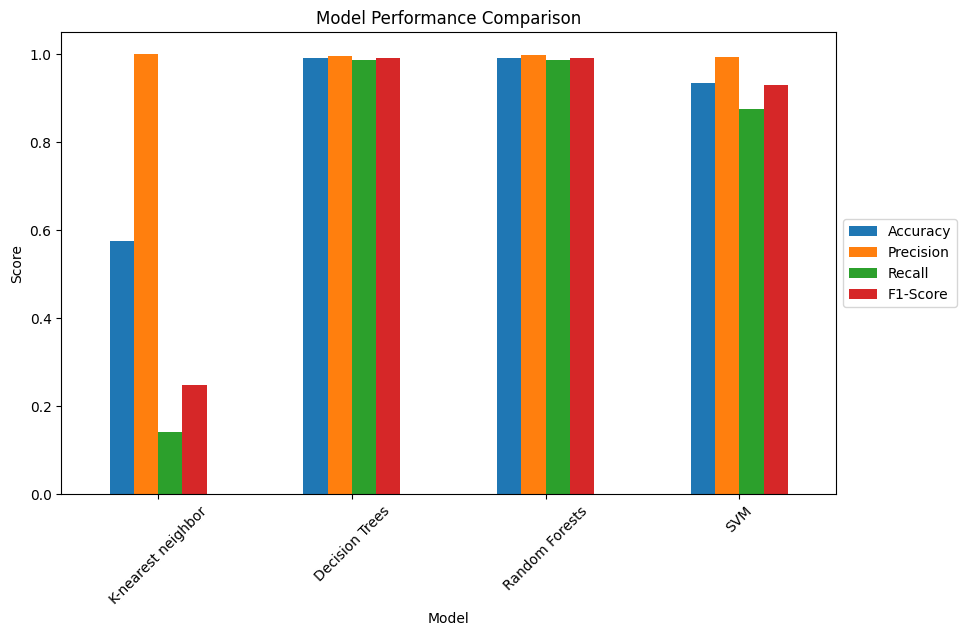

In [ ]:
# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Define a function to add model results to the DataFrame
def add_result(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1]

# K-nearest neighbor
add_result("K-nearest neighbor", y_test, y_pred_test_knn)

# Decision Trees
add_result("Decision Trees", y_test, y_pred_test_dt)

# Random Forests
add_result("Random Forests", y_test, y_pred_test_rf)

# SVM
add_result("SVM", y_test, y_pred_test_svm)

# Print the results table
print(results_df)

# Set the model names as the index for better plotting
results_df.set_index('Model', inplace=True)

# Plot the results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot

# Show the plot
plt.show()